In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

In [4]:
df_full = pd.read_csv("./data_2.csv", header=None)

# The maximum length of the dataset is the number of rows
max_length = df_full.shape[0]

# Print the maximum length
print(f"The maximum length of the dataset is: {max_length}")

# Now, you can use this information to set length_read appropriately
length_read = min(12546000, max_length)  # for example, to limit it to 100000 or the maximum length available

df_reduced = df_full.iloc[::10000, :]
# Proceed with loading the desired portion of the dataset
df = pd.read_csv("./20240229_2308.csv", header=None).iloc[1:length_read, :6]
df.columns = ["l1","l2","l3","r1","r2","r3"]
df.head()

C:\Users\yueze\AppData\Local\Temp\ipykernel_2052\1397670639.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv("./data_2.csv", header=None)


The maximum length of the dataset is: 1736737


C:\Users\yueze\AppData\Local\Temp\ipykernel_2052\1397670639.py:14: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./20240229_2308.csv", header=None).iloc[1:length_read, :6]


,l1,l2,l3,r1,r2,r3
1,-2.390720118768513,-0.5347981965169311,-0.16361381206661463,0.9987793918699026,-0.13430978171527386,-2.253967977128923
2,-2.400488128885627,-0.5347981965169311,-0.16361381206661463,1.0085474019870162,-0.15384580194950104,-2.2637359872460365
3,-2.400488128885627,-0.5347981965169311,-0.16361381206661463,1.0085474019870162,-0.15384580194950104,-2.2637359872460365
4,-2.390720118768513,-0.5347981965169311,-0.16361381206661463,0.9987793918699026,-0.13430978171527386,-2.2637359872460365
5,-2.400488128885627,-0.5347981965169311,-0.17338182218372822,1.0085474019870162,-0.13430978171527386,-2.2637359872460365


In [6]:
df.columns = ["l1","l2","l3","r1","r2","r3"]
df.head()
targets = ["r1", "r2", "r3"]
max_length = df.shape[0]

# Print the maximum length
print(f"The maximum length of the dataset is: {max_length}")
x = df.drop(columns=targets)
y = df[targets]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
correlation_coef, _ = pearsonr(y_pred.flatten(), y_test.astype(np.float64).values.flatten())


print(f"Correlation coefficient: {correlation_coef}")

The maximum length of the dataset is: 1736736
Correlation coefficient: 0.9999217304290142


ValueError: x and y must have same first dimension, but have shapes (1736736,) and (347348,)

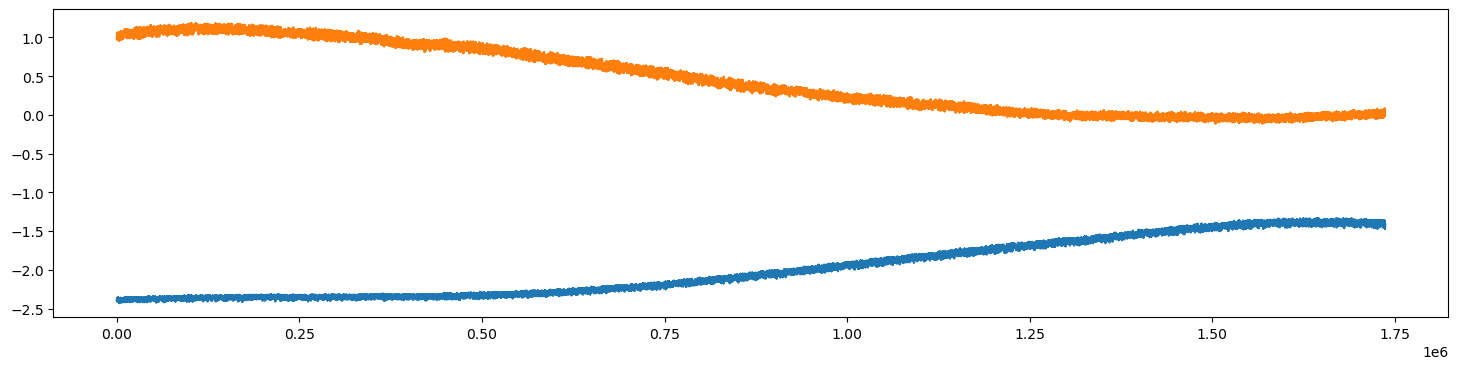

In [8]:
index_sequence = range(1, len(df) + 1)

plt.figure(figsize=(18, 4))
plt.plot(index_sequence, df["l1"].astype(np.float64).values, label="l1")
plt.plot(index_sequence, df["r1"].astype(np.float64).values, label="r1")
plt.plot(index_sequence, y_pred[:, 0], label="r1")
plt.legend(loc="upper left")
plt.xlabel("Index")
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(index_sequence, df["l1"].astype(np.float64).values, label="l1")
plt.plot(index_sequence, df["r1"].astype(np.float64).values, label="r1")
plt.plot(index_sequence, y_pred[:, 1], label="r1")
plt.legend(loc="upper left")
plt.xlabel("Index")
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(index_sequence, df["l1"].astype(np.float64).values, label="l1")
plt.plot(index_sequence, df["r1"].astype(np.float64).values, label="r1")
plt.plot(index_sequence, y_pred[:, 2], label="r1")
plt.legend(loc="upper left")
plt.xlabel("Index")
plt.show()

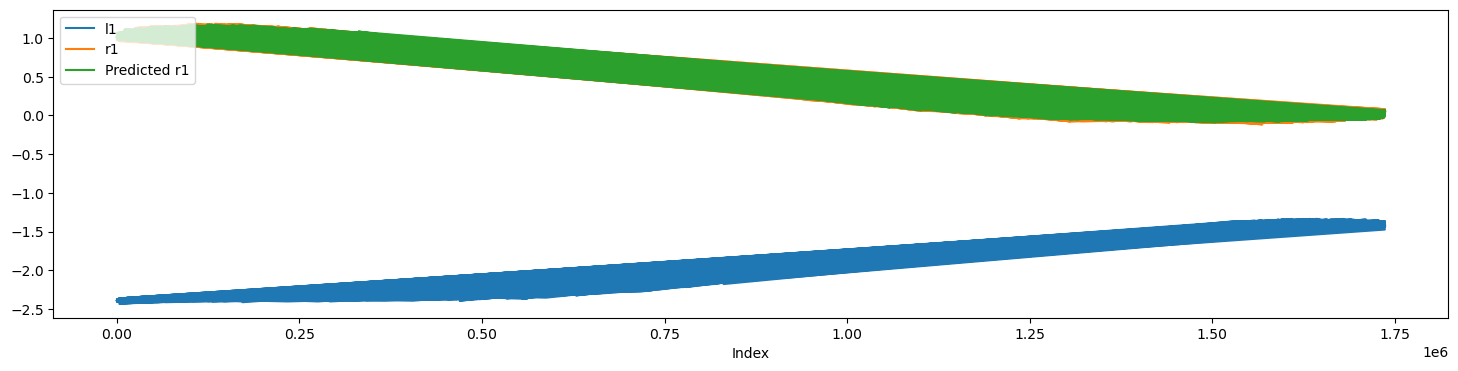

In [10]:
plt.rcParams['path.simplify_threshold'] = 1.0

# Set the chunk size to a suitable value if there are a very large number of points
plt.rcParams['agg.path.chunksize'] = 10000  # Adjust based on your data's characteristics

# Now reattempt plotting
plt.figure(figsize=(18, 4))
test_indices = x_test.index
plt.plot(test_indices, df.loc[test_indices, "l1"].astype(np.float64).values, label="l1")
plt.plot(test_indices, df.loc[test_indices, "r1"].astype(np.float64).values, label="r1")
plt.plot(test_indices, y_pred[:, 0], label="Predicted r1")
plt.legend(loc="upper left")
plt.xlabel("Index")
plt.show()

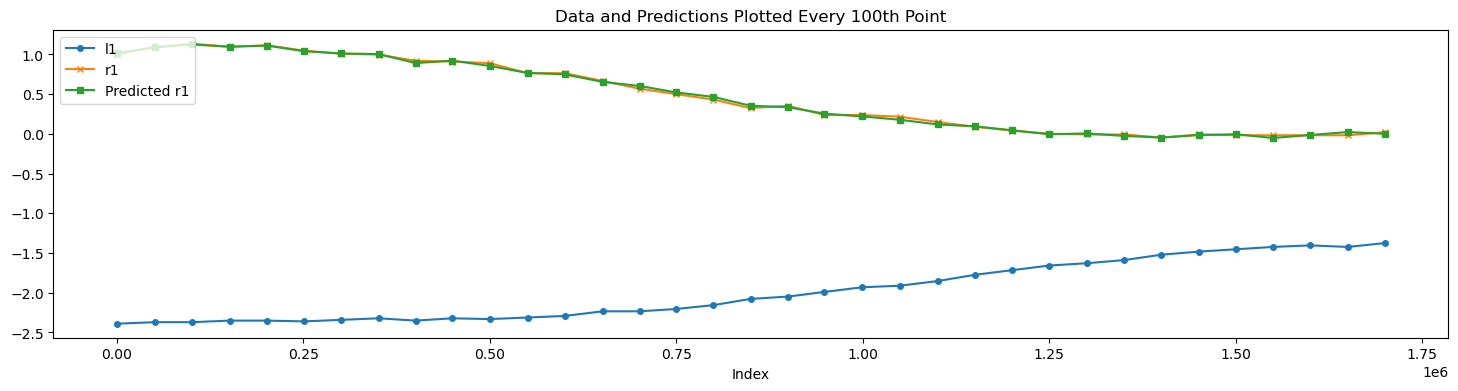

In [17]:
# Sort the test indices
sorted_test_indices = np.sort(test_indices)

# Subsample every 100th data point after sorting
sorted_test_indices_subsampled = sorted_test_indices[::10000]

plt.figure(figsize=(18, 4))

# Extracting corresponding values for 'l1' and 'r1' from the dataframe using the sorted and subsampled indices
l1_values = df.loc[sorted_test_indices_subsampled, "l1"].astype(np.float64).values
r1_values = df.loc[sorted_test_indices_subsampled, "r1"].astype(np.float64).values

# For predictions, we need to find the positions of the sorted subsampled indices in the original unsorted test indices
positions = [np.where(test_indices == idx)[0][0] for idx in sorted_test_indices_subsampled]
# Extract corresponding predictions using the found positions
sorted_predictions = y_pred[positions, 0]

# Plotting the actual and predicted data
plt.plot(sorted_test_indices_subsampled, l1_values, label="l1", marker='o', linestyle='-', markersize=4)
plt.plot(sorted_test_indices_subsampled, r1_values, label="r1", marker='x', linestyle='-', markersize=4)
plt.plot(sorted_test_indices_subsampled, sorted_predictions, label="Predicted r1", marker='s', linestyle='-', markersize=4)

plt.legend(loc="upper left")
plt.xlabel("Index")
plt.title("Data and Predictions Plotted Every 100th Point")
plt.show()

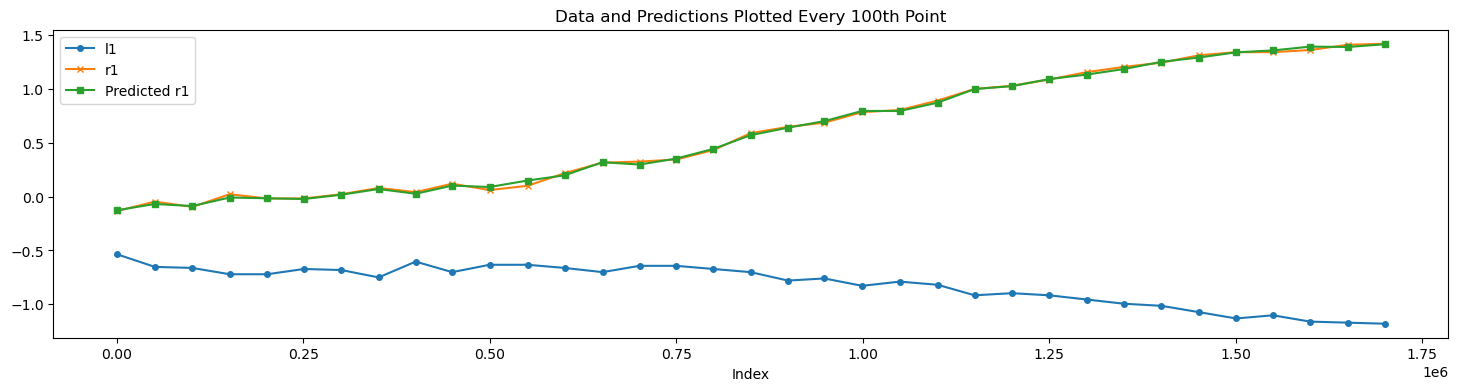

In [19]:
# Sort the test indices
sorted_test_indices = np.sort(test_indices)

# Subsample every 100th data point after sorting
sorted_test_indices_subsampled = sorted_test_indices[::10000]

plt.figure(figsize=(18, 4))

# Extracting corresponding values for 'l1' and 'r1' from the dataframe using the sorted and subsampled indices
l1_values = df.loc[sorted_test_indices_subsampled, "l2"].astype(np.float64).values
r1_values = df.loc[sorted_test_indices_subsampled, "r2"].astype(np.float64).values

# For predictions, we need to find the positions of the sorted subsampled indices in the original unsorted test indices
positions = [np.where(test_indices == idx)[0][0] for idx in sorted_test_indices_subsampled]
# Extract corresponding predictions using the found positions
sorted_predictions = y_pred[positions, 1]

# Plotting the actual and predicted data
plt.plot(sorted_test_indices_subsampled, l1_values, label="l1", marker='o', linestyle='-', markersize=4)
plt.plot(sorted_test_indices_subsampled, r1_values, label="r1", marker='x', linestyle='-', markersize=4)
plt.plot(sorted_test_indices_subsampled, sorted_predictions, label="Predicted r1", marker='s', linestyle='-', markersize=4)

plt.legend(loc="upper left")
plt.xlabel("Index")
plt.title("Data and Predictions Plotted Every 100th Point")
plt.show()

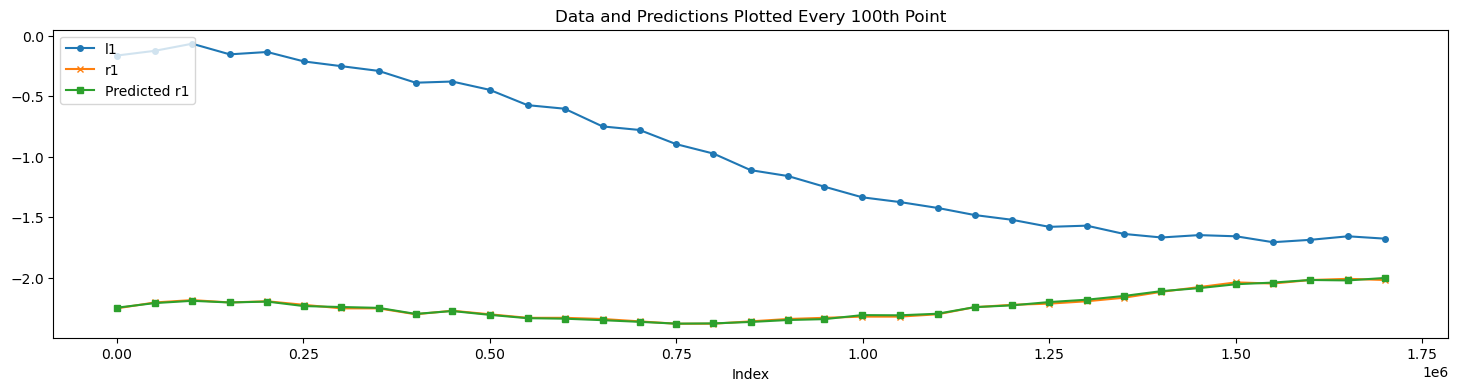

In [23]:
# Sort the test indices
sorted_test_indices = np.sort(test_indices)

# Subsample every 100th data point after sorting
sorted_test_indices_subsampled = sorted_test_indices[::10000]

plt.figure(figsize=(18, 4))

# Extracting corresponding values for 'l1' and 'r1' from the dataframe using the sorted and subsampled indices
l1_values = df.loc[sorted_test_indices_subsampled, "l3"].astype(np.float64).values
r1_values = df.loc[sorted_test_indices_subsampled, "r3"].astype(np.float64).values

# For predictions, we need to find the positions of the sorted subsampled indices in the original unsorted test indices
positions = [np.where(test_indices == idx)[0][0] for idx in sorted_test_indices_subsampled]
# Extract corresponding predictions using the found positions
sorted_predictions = y_pred[positions, 2]

# Plotting the actual and predicted data
plt.plot(sorted_test_indices_subsampled, l1_values, label="l1", marker='o', linestyle='-', markersize=4)
plt.plot(sorted_test_indices_subsampled, r1_values, label="r1", marker='x', linestyle='-', markersize=4)
plt.plot(sorted_test_indices_subsampled, sorted_predictions, label="Predicted r1", marker='s', linestyle='-', markersize=4)

plt.legend(loc="upper left")
plt.xlabel("Index")
plt.title("Data and Predictions Plotted Every 100th Point")
plt.show()

Correlation coefficient: 0.999009175052593


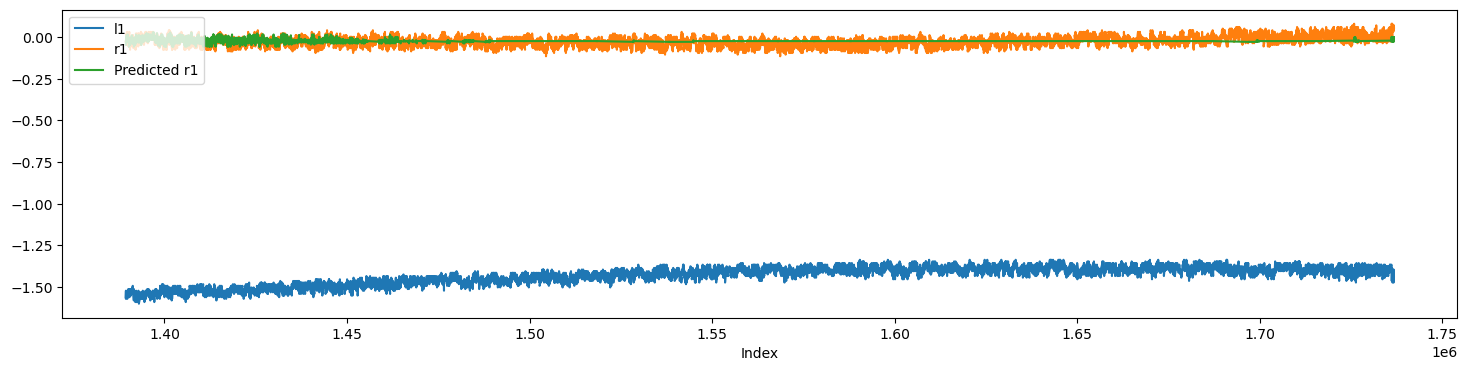

In [24]:
# Calculate the index for the 80/20 split
split_index = int(0.8 * len(df))

# Split the data into training and testing sets
x_train = df.iloc[:split_index].drop(columns=["r1", "r2", "r3"])
y_train = df.iloc[:split_index][["r1", "r2", "r3"]]
x_test = df.iloc[split_index:].drop(columns=["r1", "r2", "r3"])
y_test = df.iloc[split_index:][["r1", "r2", "r3"]]

# Training the model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Making predictions
y_pred = model.predict(x_test)

# Calculating the correlation coefficient
from scipy.stats import pearsonr
correlation_coef, _ = pearsonr(y_pred.flatten(), y_test.astype(np.float64).values.flatten())
print(f"Correlation coefficient: {correlation_coef}")

# Plotting, assuming you want to visualize the results
index_sequence = range(split_index + 1, len(df) + 1)
plt.figure(figsize=(18, 4))
plt.plot(index_sequence, df.loc[index_sequence, "l1"].astype(np.float64).values, label="l1")
plt.plot(index_sequence, df.loc[index_sequence, "r1"].astype(np.float64).values, label="r1")
plt.plot(index_sequence, y_pred[:, 0], label="Predicted r1")
plt.legend(loc="upper left")
plt.xlabel("Index")
plt.show()